## Uso de Decision Trees para mostrar explicação de decisões via regras derivadas dos ramos da DT.

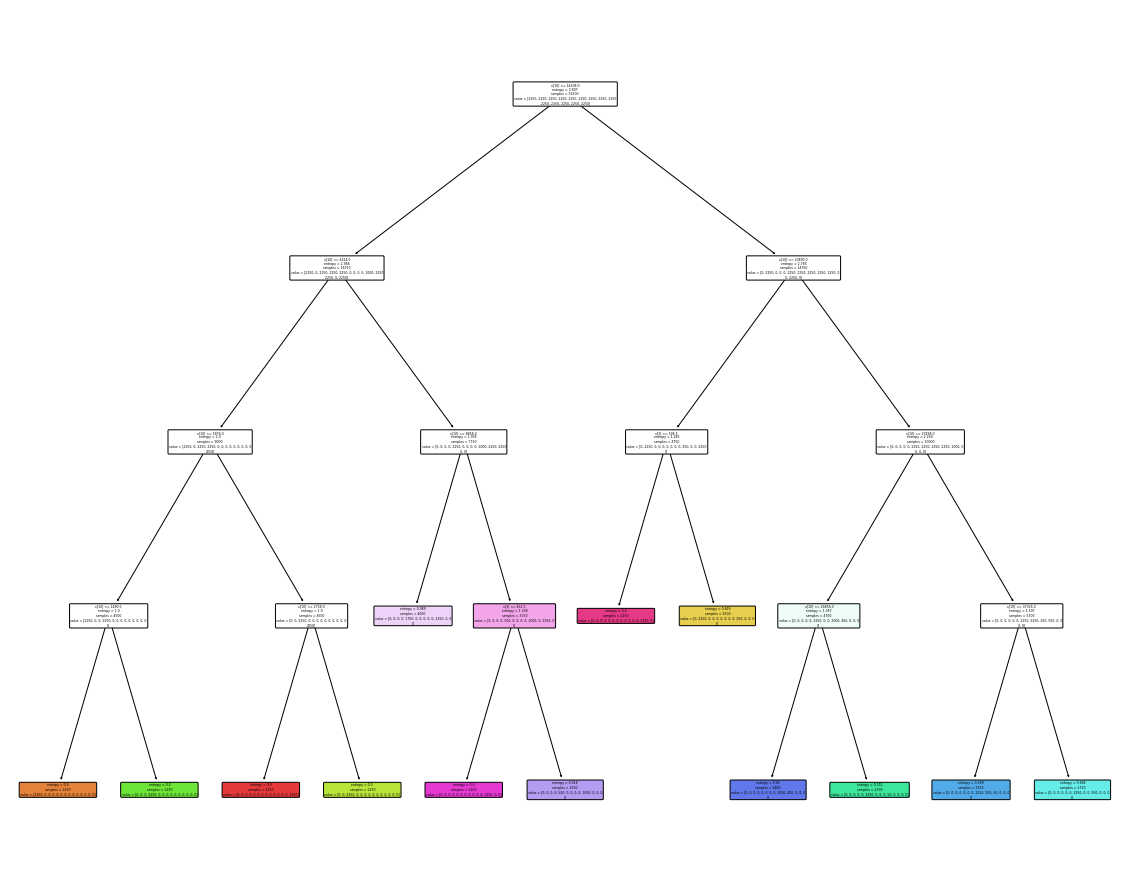

In [78]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

file_name = '../measurements.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

replace_map = {
    'Program': {
        'BubbleSort ': 0,
        'QuickSort ': 1,
        'SelectionSort ': 2
    }
}

replace_map2 = {'Language': {
                    'C ':0 ,
                    'Python Interpreted ': 1, 
                    'Python Compilled ': 2,
                    'Haskell ':3,
                    'Java ':4,
                    'C++ ':5,
                    'Prolog ':6,
                    'Ruby ':7,
                    'PHP ':8,
                    'Kotlin ':9,
                    'JavaScript ':10,
                    'C# ':11,
                    'Rust ':12,
                    'Go ':13
                    }}

y = df["Language"]
x = df.drop(columns=['Language'])
x.replace(replace_map, inplace=True)
x.replace(replace_map2,inplace=True)


clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.1)

plt.figure(figsize=(20, 16))
clf = clf.fit(x, y)
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [80]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2023)

In [81]:
clf = DecisionTreeClassifier(random_state=2023)
clf = clf.fit(x_train,y_train)

In [82]:
predictions_train = clf.predict(x_train)
predictions_test = clf.predict(x_test)

In [83]:
print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

Classification report for training data
                     precision    recall  f1-score   support

                 C        1.00      1.00      1.00      1714
                C#        1.00      1.00      1.00      1695
               C++        1.00      1.00      1.00      1689
                Go        1.00      1.00      1.00      1691
           Haskell        1.00      1.00      1.00      1698
              Java        1.00      1.00      1.00      1648
        JavaScript        1.00      1.00      1.00      1687
            Kotlin        1.00      1.00      1.00      1693
               PHP        1.00      1.00      1.00      1688
            Prolog        1.00      1.00      1.00      1699
  Python Compilled        1.00      1.00      1.00      1712
Python Interpreted        1.00      1.00      1.00      1707
              Ruby        1.00      1.00      1.00      1642
              Rust        1.00      1.00      1.00      1662

           accuracy                        

### Tuning

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [0.05, 0.1, 0.2]}

model = DecisionTreeClassifier(random_state=2023)

grid_search = GridSearchCV(model, param_grid, cv=6)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

predictions_train = grid_search.predict(x_train)
predictions_test = grid_search.predict(x_test)

print("Classification report for training data")
print(classification_report(y_train, predictions_train, zero_division=1))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test, zero_division=1))

Best parameters: {'max_depth': 6, 'min_samples_leaf': 0.05}
Best score: 0.6455026344113971
Classification report for training data
                     precision    recall  f1-score   support

                 C        1.00      1.00      1.00      1714
                C#        1.00      1.00      1.00      1695
               C++        1.00      1.00      1.00      1689
                Go        1.00      1.00      1.00      1691
           Haskell        1.00      0.00      0.00      1698
              Java        1.00      0.00      0.00      1648
        JavaScript        0.82      1.00      0.90      1687
            Kotlin        0.31      1.00      0.48      1693
               PHP        1.00      0.00      0.00      1688
            Prolog        1.00      0.00      0.00      1699
  Python Compilled        0.90      1.00      0.95      1712
Python Interpreted        0.29      1.00      0.45      1707
              Ruby        1.00      0.00      0.00      1642
              